# Brain Tumor Detection through Tensorflow ML Model

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten


In [2]:
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [3]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [4]:
from imutils import paths
import numpy as np
import matplotlib.pyplot as plt
import argparse
import cv2
import os

In [5]:
path = "D:/Naresh IT/Project/Akshay Project/Brain Tumor Database for ML project/brain_tumor_dataset"
print(os.listdir(path))

image_paths = list(paths.list_images(path))
print(len(image_paths))

['no', 'yes']
253


In [6]:
images =[]
labels=[]

for image_path in image_paths:
    label = image_path.split(os.path.sep)[-2]
    image = cv2.imread (image_path)
    image = cv2.resize(image, (224, 224))
    
    images.append(image)
    labels.append(label)

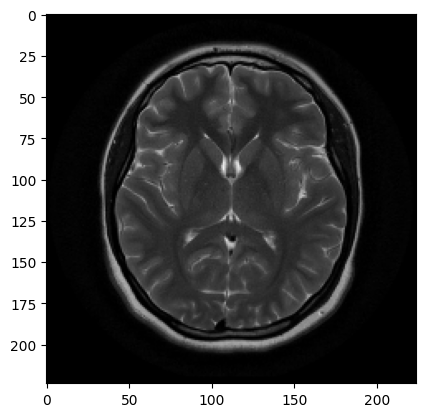

In [7]:
def plot_image(image):
    plt.imshow(image)

plot_image(images[0])

In [8]:
images = np.array(images) / 255.0
labels = np.array(labels)

In [9]:
label_binarizer = LabelBinarizer()
labels = label_binarizer.fit_transform(labels)
labels = to_categorical(labels)

print(labels[0])

[1. 0.]


In [10]:
train_X, test_X, train_y, test_y = train_test_split(images, labels, test_size=0.10, random_state= 42, stratify=labels)

In [11]:
train_generator = ImageDataGenerator(fill_mode='nearest', rotation_range=15)

In [12]:
base_model = VGG16(weights = 'imagenet', input_tensor = Input (shape = (224, 224, 3)), include_top = False)
base_input = base_model.input
base_output = base_model.output
base_output = AveragePooling2D(pool_size = (4,4))(base_output)
base_output = Flatten (name="flatten")(base_output)
base_output = Dense(64, activation="relu")(base_output)
base_output = Dropout(0.5)(base_output)
base_output = Dense(2, activation = "softmax")(base_output)

In [13]:
for layers in base_model.layers:
    layers.trainable = False

In [14]:
model = Model(inputs = base_input, outputs = base_output)
model.compile(optimizer= Adam(learning_rate= 1e-3), metrics= ['accuracy'], loss= 'binary_crossentropy')

In [15]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [16]:
batch_size=8
train_steps=len(train_X) // batch_size
validation_steps = len(test_X) // batch_size
epochs=10

In [17]:
history = model.fit_generator(train_generator.flow(train_X, train_y, batch_size=batch_size),
                             steps_per_epoch = train_steps,
                             validation_data=(test_X, test_y),
                             validation_steps = validation_steps,
                             epochs = epochs)

C:\Users\wanja\AppData\Local\Temp\ipykernel_5864\4165567911.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator.flow(train_X, train_y, batch_size=batch_size),


Epoch 1/10
28/28 [==============================] - 38s 1s/step - loss: 0.7190 - accuracy: 0.5753 - val_loss: 0.5920 - val_accuracy: 0.8462
Epoch 2/10
28/28 [==============================] - 33s 1s/step - loss: 0.6532 - accuracy: 0.6301 - val_loss: 0.5402 - val_accuracy: 0.7308
Epoch 3/10
28/28 [==============================] - 33s 1s/step - loss: 0.6175 - accuracy: 0.6712 - val_loss: 0.5062 - val_accuracy: 0.9231
Epoch 4/10
28/28 [==============================] - 34s 1s/step - loss: 0.5892 - accuracy: 0.6804 - val_loss: 0.4678 - val_accuracy: 0.9231
Epoch 5/10
28/28 [==============================] - 37s 1s/step - loss: 0.5828 - accuracy: 0.7260 - val_loss: 0.4464 - val_accuracy: 0.9231
Epoch 6/10
28/28 [==============================] - 33s 1s/step - loss: 0.5513 - accuracy: 0.7626 - val_loss: 0.4054 - val_accuracy: 0.9231
Epoch 7/10
28/28 [==============================] - 33s 1s/step - loss: 0.5551 - accuracy: 0.7352 - val_loss: 0.4566 - val_accuracy: 0.8846
Epoch 8/10
28/28 [==

In [18]:
predictions = model.predict(test_X, batch_size = batch_size)
predictions = np.argmax(predictions, axis = 1)
actuals = np.argmax(test_y, axis = 1)

4/4 [==============================] - 4s 770ms/step


In [19]:
print(classification_report(actuals, predictions, target_names=label_binarizer.classes_))

cm=confusion_matrix(actuals, predictions)
print(cm)

              precision    recall  f1-score   support

          no       0.77      1.00      0.87        10
         yes       1.00      0.81      0.90        16

    accuracy                           0.88        26
   macro avg       0.88      0.91      0.88        26
weighted avg       0.91      0.88      0.89        26

[[10  0]
 [ 3 13]]


In [20]:
total = sum(sum(cm))
accuracy = (cm[0,0]+cm[1,1])/total
print("Accuracy: {:.4f}".format(accuracy))

Accuracy: 0.8846


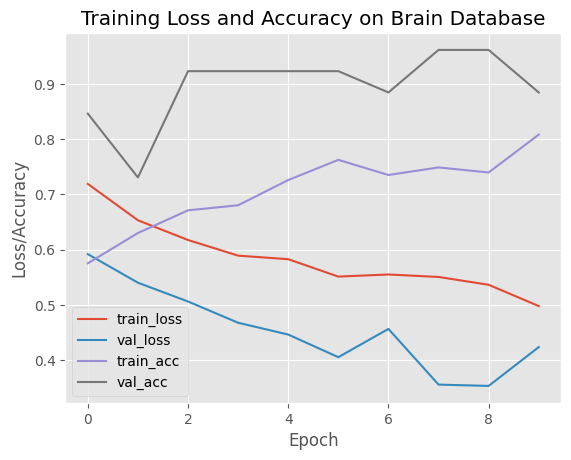

In [21]:
N=epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label = "val_loss")

plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")

plt.title("Training Loss and Accuracy on Brain Database")
plt.xlabel("Epoch")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.jpg")